In [1]:
# prediction model on churn dataset

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# imporing dataset
df1 = pd.read_csv("Customer-Churn.csv")
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df1.shape

(7043, 21)

In [6]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# drop unnecessary columns
df1.drop('customerID', axis='columns', inplace=True)

In [8]:
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [9]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# remove blank columns
df2 = df1[~(df1.TotalCharges == " ")]

In [11]:
df2.shape

(7032, 20)

In [12]:
# change column datatype
df2.TotalCharges = pd.to_numeric(df2.TotalCharges)

In [13]:
df2.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [14]:
df2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
df2.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [16]:
churn_no = df2['tenure'][df2.Churn == "No"]
churn_yes = df2['tenure'][df2.Churn == "Yes"]

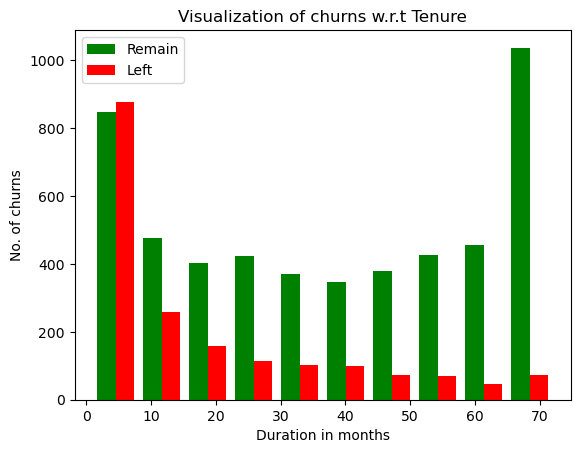

In [17]:
plt.xlabel("Duration in months")
plt.ylabel("No. of churns")
plt.hist([churn_no, churn_yes], color=['green','red'], label=['Remain','Left'])
plt.title("Visualization of churns w.r.t Tenure")
plt.legend()

In [18]:
churn_no = df2['MonthlyCharges'][df2.Churn == "No"]
churn_yes = df2['MonthlyCharges'][df2.Churn == "Yes"]

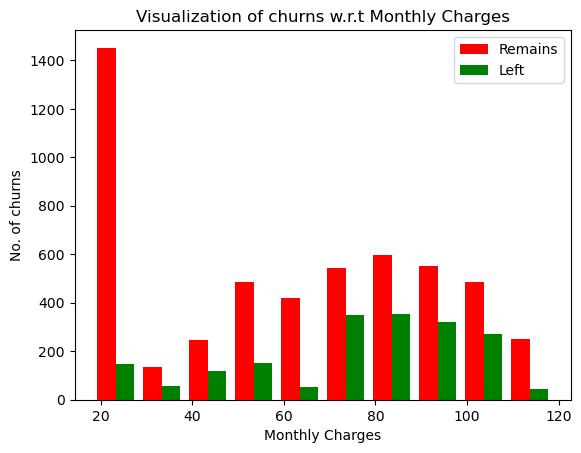

In [19]:
plt.hist([churn_no, churn_yes], label=['Remains', 'Left'], color=['red', 'green'])
plt.xlabel("Monthly Charges")
plt.ylabel("No. of churns")
plt.title("Visualization of churns w.r.t Monthly Charges")
plt.legend()

In [20]:
# finding unique values of each column
def unique(df):
    for cells in df:
#         if df[cells].dtypes == 'object':
        print(cells,"\t\t",df[cells].unique())

unique(df2)

gender 		 ['Female' 'Male']
SeniorCitizen 		 [0 1]
Partner 		 ['Yes' 'No']
Dependents 		 ['No' 'Yes']
tenure 		 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService 		 ['No' 'Yes']
MultipleLines 		 ['No phone service' 'No' 'Yes']
InternetService 		 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 		 ['No' 'Yes' 'No internet service']
OnlineBackup 		 ['Yes' 'No' 'No internet service']
DeviceProtection 		 ['No' 'Yes' 'No internet service']
TechSupport 		 ['No' 'Yes' 'No internet service']
StreamingTV 		 ['No' 'Yes' 'No internet service']
StreamingMovies 		 ['No' 'Yes' 'No internet service']
Contract 		 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 		 ['Yes' 'No']
PaymentMethod 		 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges 		 [29.85 56.95 53.85 

In [21]:
# removing text anomaly 1
df2.gender.replace({'Female' : 0, 'Male' : 1}, inplace=True)
unique(df2)

gender 		 [0 1]
SeniorCitizen 		 [0 1]
Partner 		 ['Yes' 'No']
Dependents 		 ['No' 'Yes']
tenure 		 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService 		 ['No' 'Yes']
MultipleLines 		 ['No phone service' 'No' 'Yes']
InternetService 		 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 		 ['No' 'Yes' 'No internet service']
OnlineBackup 		 ['Yes' 'No' 'No internet service']
DeviceProtection 		 ['No' 'Yes' 'No internet service']
TechSupport 		 ['No' 'Yes' 'No internet service']
StreamingTV 		 ['No' 'Yes' 'No internet service']
StreamingMovies 		 ['No' 'Yes' 'No internet service']
Contract 		 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 		 ['Yes' 'No']
PaymentMethod 		 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges 		 [29.85 56.95 53.85 ... 63.1  44

In [22]:
# removing text anomaly 2
df2.replace({'No phone service' : 'No'}, inplace=True)
df2.replace({'No internet service' : 'No'}, inplace=True)
unique(df2)

gender 		 [0 1]
SeniorCitizen 		 [0 1]
Partner 		 ['Yes' 'No']
Dependents 		 ['No' 'Yes']
tenure 		 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService 		 ['No' 'Yes']
MultipleLines 		 ['No' 'Yes']
InternetService 		 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 		 ['No' 'Yes']
OnlineBackup 		 ['Yes' 'No']
DeviceProtection 		 ['No' 'Yes']
TechSupport 		 ['No' 'Yes']
StreamingTV 		 ['No' 'Yes']
StreamingMovies 		 ['No' 'Yes']
Contract 		 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 		 ['Yes' 'No']
PaymentMethod 		 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges 		 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges 		 [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn 		 ['No' 'Yes']


In [23]:
# removing text anomaly 3
multiple_yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for cells in multiple_yes_no_columns:
    df2[cells].replace({'Yes' : 1, 'No' : 0}, inplace=True)

unique(df2)

gender 		 [0 1]
SeniorCitizen 		 [0 1]
Partner 		 [1 0]
Dependents 		 [0 1]
tenure 		 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService 		 [0 1]
MultipleLines 		 [0 1]
InternetService 		 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 		 [0 1]
OnlineBackup 		 [1 0]
DeviceProtection 		 [0 1]
TechSupport 		 [0 1]
StreamingTV 		 [0 1]
StreamingMovies 		 [0 1]
Contract 		 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 		 [1 0]
PaymentMethod 		 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges 		 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges 		 [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn 		 [0 1]


In [24]:
# removing text anomaly 4
df3 = pd.get_dummies(data=df2, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype='int')
df3.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [25]:
df3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df3.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [27]:
# scaling the columns values to increase model accuracy

# TYPICAL WAY
# df3['tenure'] = MinMaxScaler().fit_transform(df3[['tenure']])
# df3['MonthlyCharges'] = MinMaxScaler().fit_transform(df3[['MonthlyCharges']])
# df3['TotalCharges'] = MinMaxScaler().fit_transform(df3[['TotalCharges']])

# EASY WAY
scaling_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df3[scaling_columns] = MinMaxScaler().fit_transform(df3[scaling_columns])

df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [28]:
unique(df3)

gender 		 [0 1]
SeniorCitizen 		 [0 1]
Partner 		 [1 0]
Dependents 		 [0 1]
tenure 		 [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService 		 [0 1]
MultipleLines 		 [0 1]
OnlineSecurity 		 [0 1]
OnlineBackup 		 [1 0]
DeviceProtection 		 

In [29]:
X = df3.drop('Churn', axis='columns')
X.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1


In [49]:
y = df3.Churn
y.head(3)

0    0
1    0
2    1
Name: Churn, dtype: int64

In [51]:
X.shape

(7032, 26)

In [52]:
y.shape

(7032,)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
X_train.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No                           int32
Contract_Month-to-month        

In [32]:
# creating model without any hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(26,), activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)



Epoch 1/20


176/176 [==============================] - 1s 1ms/step - loss: 0.5660 - accuracy: 0.7276
Epoch 2/20
176/176 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7534
Epoch 3/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7746
Epoch 4/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7820
Epoch 5/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.7892
Epoch 6/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.7915
Epoch 7/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4404 - accuracy: 0.7931
Epoch 8/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.7956
Epoch 9/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.7970
Epoch 10/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.

In [33]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.7953


[0.41920772194862366, 0.7953091859817505]

In [34]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [35]:
samples = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.5:
        samples.append(0)
    else:
        samples.append(1)

In [36]:
samples[:20]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [37]:
y_test[:20]

838     0
2171    0
6102    0
6773    1
2237    0
5907    0
6416    0
4365    0
4035    0
2018    1
260     1
3870    0
4772    0
2991    0
68      0
6897    0
2450    0
5461    0
6845    0
5811    0
Name: Churn, dtype: int64

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(26,), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
176/176 [==============================] - 1s 1ms/step - loss: 0.5426 - accuracy: 0.7390
Epoch 2/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4592 - accuracy: 0.7771
Epoch 3/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.7870
Epoch 4/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.7922
Epoch 5/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.7941
Epoch 6/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.7957
Epoch 7/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.7973
Epoch 8/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8007
Epoch 9/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8000
Epoch 10/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8030

In [39]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.7918


[0.41880860924720764, 0.7917554974555969]

In [40]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [41]:
samples = []
for i in range(len(y_pred)):
    if y_pred[i]<0.5:
        samples.append(0)
    else:
        samples.append(1)

In [42]:
samples[:20]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [43]:
y_test[:20]

838     0
2171    0
6102    0
6773    1
2237    0
5907    0
6416    0
4365    0
4035    0
2018    1
260     1
3870    0
4772    0
2991    0
68      0
6897    0
2450    0
5461    0
6845    0
5811    0
Name: Churn, dtype: int64

In [44]:
# testing
ones = 0
zeroes = 0
for i in range(len(samples)):
    if samples[i] == 1:
        ones = ones + 1;
    else:
        zeroes = zeroes + 1
print(ones)
print(zeroes)

322
1085


In [45]:
# testing
ones = 0
zeroes = 0
for val in y_test:
    if val == 1:
        ones = ones + 1;
    else:
        zeroes = zeroes + 1
print(ones)
print(zeroes)

363
1044
